# <b>Estatística</b>
---

## <b>Introdução</b>

### <i>Fatos são obstinados, mas estatísticas são mais maleáveis</i>

    — Mark Twain

### Estatística se refere à matemática e às técnicas das quais nós entendemos dados. É um campo rico e enorme, que encaixa melhor em uma biblioteca inteira do que em um capítulo de um livro. A discussão de estatística nesse livro não será tão profunda; será necessário explorar mais de outras fontes.

## <b>Descrevendo um único conjunto de dados</b>

### Com uma combinação de sorte e adaptabilidade, a rede social do capítulo 1 cresceu e agora abriga dezenas de membros, e o diretor do projeto te pede algum tipo de descrição de quantos amigos os membros possuem para que ele possa incluir esse valor em suas conversas de elevador.

### Usando técnicas do capítulo 1, você consegue facilmente produzir esses dados. Mas agora você encontra um problema: como descrevê-los?

### Uma descrição óbvia de qualquer conjunto de dados seria os dados em si. Para um dataset pequeno o suficiente, essa pode ser até mesmo a melhor visualização. Porém, para um dataset maior, isso não tem sentido; (imagine-se olhando para uma lista de um milhão de números tentando tirar alguma conclusão). Por esse motivo, utilizamos estatística para destilar e comunicar características importantes dos dados.

### Como um primeiro approach, você coloca a quantidade de amigos em um histograma:

In [2]:
import random
# número total de registros
total_registros = 200

# parâmetro para controlar a distribuição
parametro = 2.0

# número de amigos com distribuição negativa
lista_amigos = [random.randint(0, 100) for _ in range(total_registros)]
lista_amigos += [random.randint(0, 50) for _ in range(total_registros)]
lista_amigos += [random.randint(0, 25) for _ in range(total_registros)]
lista_amigos += [random.randint(0, 10) for _ in range(int(total_registros/2))]

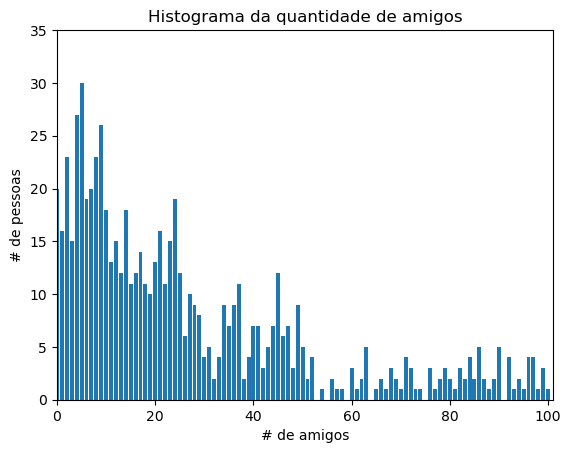

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

quantidade_de_amigos = Counter(lista_amigos)
xs = range(101) # maior valor é 100
ys = [quantidade_de_amigos[x] for x in xs] # a altura é o número de amigos
plt.bar(xs, ys)
plt.axis([0, 101, 0, 35])
plt.title("Histograma da quantidade de amigos")
plt.xlabel("# de amigos")
plt.ylabel("# de pessoas")
plt.show()

### Infelizmente, essa visualização ainda é muito difícil de encaixar em conversas. Então você começa a desenvolver algumas estatísticas. Provavelmente a mais simples é o número de pontos de dados:

In [4]:
numero_de_pontos = len(lista_amigos)
numero_de_pontos

700

### Você também está provavelmente interessado no maior e no menor valor:

In [5]:
maior_valor = max(lista_amigos)
menor_valor = min(lista_amigos)

print(maior_valor)
print(menor_valor)

100
0


### Que são casos especiais dos valores em posições específicas

In [6]:
valores_ordenados = sorted(lista_amigos)

menor_valor = valores_ordenados[0]
segundo_menor_valor = valores_ordenados[1]
maior_valor = valores_ordenados[-1]
segundo_maior_valor = valores_ordenados[-2]

print(menor_valor, segundo_menor_valor, maior_valor, segundo_maior_valor)

0 0 100 99


## <b>Tendências Centrais</b>

### Geralmente iremos querer ter alguma noção de onde os dados estão centrado. Mais comumente, utilizaremos a média (mean, average), a qual é só uma soma dos dados dividida pela quantidade.

In [11]:
def mean(dados: list[float]) -> float:
    return sum(dados)/len(dados)


print(mean(list(map(lambda x: float(x), lista_amigos))))
## uma extensao do vscode está dizendo que uma lista de ints não pode ser utilizada com floats
## vamos fazer uma função para consertar isso

def list_float(dados: list[int]) -> list[float]:
    return [float(i) for i in dados]

print(mean(list_float(lista_amigos)))

26.775714285714287
26.775714285714287


### Se você tem dois data points, a média é simplesmente o ponto bem na metade entre os dois. Conforme você adiciona mais pontos, a média se move ao redor; mas sempre depende do valor de cada ponto. Por exemplo, se você tiver 10 pontos de dados e aumentar o valor de qualquer um deles por 1, o aumento da média vai ser de 1/10 ou 0.1

### Também podemos estar interessados na mediana, que é o valor do meio (se o número de data points for ímpar) ou a média dos dois pontos centrais (se o número de data points for par). A mediana é sempre considerada em uma instância ordenada dos dados.

In [17]:
# O underline antes das funções indica que são funções privadas, que não devem ser
# utilizadas pelo usuário final da biblioteca

def _median_odd(xs: list[float]) -> float:
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: list[float]) -> float:
    sorted_xs = sorted(xs)
    hi_mipoint = len(xs) // 2
    return (sorted_xs[hi_mipoint - 1] + sorted_xs[hi_mipoint]) / 2

def median(xs: list[float]) -> float:
    return _median_even(xs) if len(xs) % 2 == 0 else _median_odd(xs) 


assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2 

### E agora podemos computar a mediana de amigos:

In [18]:
print(median(list_float(lista_amigos)))

19.0
